# Esercizi sulle variabili aleatorie discrete

### Librerie

In [ ]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
from scipy.stats import geom
from scipy.stats import binom

1. Due centralini, tra di loro indipendenti, ricevono nell’unità di tempo un numero di telefonate X e Y
aventi legge di Poisson di parametri rispettivamente λ e μ.
- Qual è la probabilità che nell’unità di tempo i due centralini ricevano insieme non più di tre
telefonate, supponendo λ = 2 e μ = 4?
- Calcolare la legge condizionale di X dato X+Y=n. Si tratta di una densità nota? Quanto vale la
media di questa legge condizionale?
- Supponendo λ = 2 e μ = 4 e sapendo che nell’unità di tempo i due centralini hanno ricevuto
complessivamente 8 telefonate, qual è la probabilità che il primo ne abbia ricevute 3?

In [2]:
lam = 2 # parametro di X
mu = 4 # parametro di Y
k = 3

X = sum(poisson.pmf(k, lam) for k in range(0, k+1)) 
Y = sum(poisson.pmf(k, mu) for k in range(0, k+1)) 

p_es1 = X * Y

p_es1

0.3715374095914353

#### Spiegazione
La legge condizionale di X dato X + Y = n è una densità di probabilità condizionale. Può essere calcolata utilizzando la definizione di densità condizionale:

        f X,X+Y = n​(x,n) / f X+Y = n​(n)
dove 

- f X,X+Y = n​(x,n) -> la densità congiunta di X e X + Y
- f X+Y = n​(n) -> la densità marginale di X + Y

#### Densità congiunta
Dobbiamo calcolare la densità congiunta di X e X + Y. Poiché X e Y sono indipendenti e seguono una legge di Poisson con parametri λ e μ rispettivamente, la densità congiunta sarà il prodotto delle loro densità di Poisson.

#### Densità marginale
Ora, dobbiamo calcolare la densità marginale di X + Y. La somma di due variabili di Poisson indipendenti è anche una variabile di Poisson con parametro uguale alla somma dei parametri delle variabili originali.

#### Media
La media di X dato X + Y = n sarà la somma ponderata di x * f_X|X+Y=n(x|n) su tutti i valori di x

E[X|X+Y=n] = Σ(x * f_X|X+Y = n(x|n)) per tutti i valori di x.

In [3]:
# Densità condizionale di X dato X + Y = n
def d_condizionale(n, x):
    d_congiunta = poisson.pmf(x, lam) * poisson.pmf(n - x, mu)
    d_marginale = poisson.pmf(n, lam + mu)
    return d_congiunta / d_marginale

# Media di X dato X + Y = n
def valore_atteso(n):
    return sum(x * d_condizionale(n, x) for x in range(n + 1))

n = int(X+Y)
densità = [d_condizionale(n, x) for x in range(n + 1)]
media = valore_atteso(n)

print(f'Legge condizionale: {densità}')
print(f'Media: {media}')

Legge condizionale: [0.666666666666667, 0.3333333333333335]
Media: 0.3333333333333335


In [4]:
Bayes = lambda A,B : (A*B)/B

k_tot = 8
k1 = 3
k2 = k_tot - 3
lambda_mu = lam + mu

p_es1 = Bayes(poisson.pmf(k1, lam), poisson.pmf(k_tot, lambda_mu))

p_es1

0.18044704431548358

2. Da una rilevazione risulta che il numero di incidenti stradali che avvengono ad un determinato
incrocio in un mese segue una distribuzione di Poisson con valor medio 1.5.
- Qual è la probabilità che in un mese non ci siano incidenti?
- Qual è la probabilità che in un mese ci siano più di due incidenti?

In [5]:
lam = 1.5
k = 0
p_es2 = poisson.pmf(k, lam)

p_es2

0.22313016014842982

In [6]:
p_es2 = 1-sum(poisson.pmf(k, lam) for k in range(2+1))

p_es2 

0.19115316946194194

3) La probabilità di contrarre una malattia rara è dello 0.03%.
- Qual è la probabilità che in una città dove vivono 20.000 persone vi siano meno di 4 persone che contraggono la malattia?
- Costruire il grafico della densità e della funzione di ripartizione della distribuzione in esame.

In [7]:
p = 3/100
n = 20000
k = 4
lam = n*p

p_es3 = poisson.cdf(k, lam) # P(X <= 4)

p_es3

1.4408034326399483e-251

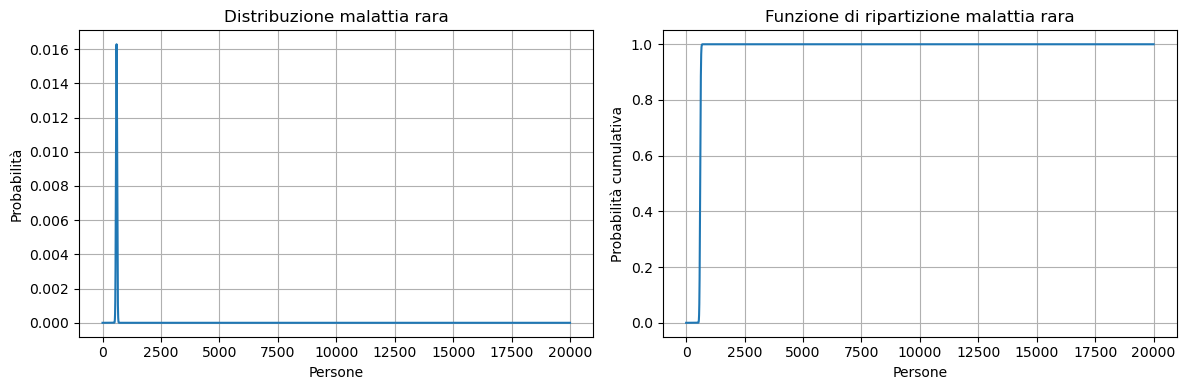

In [8]:
x = range(0, n+1)
y_pmf = poisson.pmf(x, lam)
y_cdf = poisson.cdf(x, lam)

plt.figure(figsize=(12, 4))

# Grafico della densità
plt.subplot(121)
plt.plot(x, y_pmf)
plt.title("Distribuzione malattia rara")
plt.xlabel("Persone")
plt.ylabel("Probabilità")
plt.grid()

# Grafico della funzione di ripartizione
plt.subplot(122)
plt.plot(x, y_cdf)
plt.title("Funzione di ripartizione malattia rara")
plt.xlabel("Persone")
plt.ylabel("Probabilità cumulativa")
plt.grid()

plt.tight_layout()  # Ottimizza la disposizione dei subplot
plt.show()

4) Si lancia un dado equilibrato finché non esca un numero dispari.
- Qual è la probabilità che ciò avvenga al quarto tentativo?
- Quanti tentativi sono necessari affinché si abbia una probabilità maggiore del 95% che esca un
numero dispari esattamente al tentativo successivo?
- Sapendo che nei primi 4 lanci non si è avuto un numero dispari, qual è la probabilità che si
abbia un numero dispari per la prima volta al settimo tentativo?

In [9]:
p = 1/2
t = 4 # tempo di primo successo

p_es4 = geom.pmf(t, p)
p_es4

0.0625

In [ ]:
p_target = 95/100

n = 1
while True:
    pn = geom.pmf(n, p) # probabilità di ottenere un successo dopo n tentativi
    if pn >= p_target:
        break
    n += 1
n

In [11]:
# P(T = 7 | T > 4) -> P (T = 3)

t = 3
p_es4 = geom.pmf(t, p)
p_es4

0.125

5) Si supponga che tre negozi della stessa tipologia attraggano rispettivamente il 20% della clientela, il
45% e il 35%. 
- Scegliendo a caso 6 clienti, qual è la probabilità che 2 vadano nel primo negozio, 1 nel
secondo e 3 nel terzo? 
- Qual è la probabilità che nessun cliente vada nel primo negozio?

In [12]:
p1, k1 = 20/100, 2
p2, k2 = 45/100, 1
p3, k3 = 35/100, 3
n = 6

pn1 = binom.pmf(k1, n, p1)
pn2 = binom.pmf(k2, n, p2)
pn3 = binom.pmf(k3, n, p3)

p_es5 = pn1 * pn2 * pn3
p_es5

0.007864345930240796

In [13]:
k = 0
p_es5 = binom.pmf(k, n, p1)

p_es5

0.2621440000000001